In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import os
import shutil
import random
from shutil import copyfile
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import Image
import scipy
import dlib

In [2]:
source_path = 'data_cropped'
#source_path = 'data_real'

source_path_level_0 = os.path.join(source_path, 'Level_0')
source_path_level_1 = os.path.join(source_path, 'Level_1')
source_path_level_2 = os.path.join(source_path, 'Level_2')

print(f"There are {len(os.listdir(source_path_level_0))} images in level 0.")
print(f"There are {len(os.listdir(source_path_level_1))} images of level 1.")
print(f"There are {len(os.listdir(source_path_level_2))} images of level 2.")

There are 385 images in level 0.
There are 473 images of level 1.
There are 129 images of level 2.


In [3]:

root_dir = 'data_cropped/split_data'
# root_dir = 'data_real/split_data'

if os.path.exists(root_dir):
  shutil.rmtree(root_dir)

# GRADED FUNCTION: create_train_val_dirs
def create_train_val_dirs(root_path):


  os.makedirs(root_path, exist_ok=True)

  train_dir = os.path.join(root_path, 'training')
  validation_dir = os.path.join(root_path, 'validation')

  train_level_0_dir = os.path.join(train_dir, 'Level_0')
  train_level_1_dir = os.path.join(train_dir, 'Level_1')
  train_level_2_dir = os.path.join(train_dir, 'Level_2')

  validation_level_0_dir = os.path.join(validation_dir, 'Level_0')
  validation_level_1_dir = os.path.join(validation_dir, 'Level_1')
  validation_level_2_dir = os.path.join(validation_dir, 'Level_2')

  os.makedirs(train_level_0_dir, exist_ok=True)
  os.makedirs(train_level_1_dir, exist_ok=True)
  os.makedirs(train_level_2_dir, exist_ok=True)
  os.makedirs(validation_level_0_dir, exist_ok=True)
  os.makedirs(validation_level_1_dir, exist_ok=True)
  os.makedirs(validation_level_2_dir, exist_ok=True)


try:
  create_train_val_dirs(root_path=root_dir)
except FileExistsError:
  print("You should not be seeing this since the upper directory is removed beforehand")

In [4]:
for rootdir, dirs, files in os.walk(root_dir):
    for subdir in dirs:
        print(os.path.join(rootdir, subdir))

data_cropped/split_data/training
data_cropped/split_data/validation
data_cropped/split_data/training/Level_2
data_cropped/split_data/training/Level_0
data_cropped/split_data/training/Level_1
data_cropped/split_data/validation/Level_2
data_cropped/split_data/validation/Level_0
data_cropped/split_data/validation/Level_1


In [5]:
# grader-required-cell

# GRADED FUNCTION: split_data
def split_data(SOURCE_DIR, TRAINING_DIR, VALIDATION_DIR, SPLIT_SIZE):
  ### START CODE HERE
  files = []
  for filename in os.listdir(SOURCE_DIR):
      file = SOURCE_DIR + filename
      if os.path.getsize(file) > 0:
          files.append(filename)
      else:
          print(f"{filename} is zero length, so ignoring.")


  random.shuffle(files)

  split_idx = int(SPLIT_SIZE * len(files))

  train_files = files[:split_idx]
  validation_files = files[split_idx:]

  for filename in train_files:
      source_file = os.path.join(SOURCE_DIR, filename)
      destination_file = os.path.join(TRAINING_DIR, filename)
      copyfile(source_file, destination_file)

  for filename in validation_files:
      source_file = os.path.join(SOURCE_DIR, filename)
      destination_file = os.path.join(VALIDATION_DIR, filename)
      copyfile(source_file, destination_file)


In [8]:
# grader-required-cell

# Test your split_data function

# Define paths

LEVEL_0_SOURCE_DIR = 'data_cropped/Level_0/'
LEVEL_1_SOURCE_DIR = 'data_cropped/Level_1/'
LEVEL_2_SOURCE_DIR = 'data_cropped/Level_2/'

TRAINING_DIR = "data_cropped/split_data/training/"
VALIDATION_DIR = "data_cropped/split_data/validation/"

TRAINING_LEVEL_0_DIR = os.path.join(TRAINING_DIR, "Level_0/")
VALIDATION_LEVEL_0_DIR = os.path.join(VALIDATION_DIR, "Level_0/")

TRAINING_LEVEL_1_DIR = os.path.join(TRAINING_DIR, "Level_1/")
VALIDATION_LEVEL_1_DIR = os.path.join(VALIDATION_DIR, "Level_1/")

TRAINING_LEVEL_2_DIR = os.path.join(TRAINING_DIR, "Level_2/")
VALIDATION_LEVEL_2_DIR = os.path.join(VALIDATION_DIR, "Level_2/")


# Empty directories in case you run this cell multiple times
if len(os.listdir(TRAINING_LEVEL_0_DIR)) > 0:
  for file in os.scandir(TRAINING_LEVEL_0_DIR):
    os.remove(file.path)
if len(os.listdir(TRAINING_LEVEL_1_DIR)) > 0:
  for file in os.scandir(TRAINING_LEVEL_1_DIR):
    os.remove(file.path)
if len(os.listdir(TRAINING_LEVEL_2_DIR)) > 0:
  for file in os.scandir(TRAINING_LEVEL_2_DIR):
    os.remove(file.path)
if len(os.listdir(VALIDATION_LEVEL_0_DIR)) > 0:
  for file in os.scandir(VALIDATION_LEVEL_0_DIR):
    os.remove(file.path)
if len(os.listdir(VALIDATION_LEVEL_1_DIR)) > 0:
  for file in os.scandir(VALIDATION_LEVEL_1_DIR):
    os.remove(file.path)
if len(os.listdir(VALIDATION_LEVEL_2_DIR)) > 0:
  for file in os.scandir(VALIDATION_LEVEL_2_DIR):
    os.remove(file.path)


split_size = .8

split_data(LEVEL_0_SOURCE_DIR, TRAINING_LEVEL_0_DIR, VALIDATION_LEVEL_0_DIR, split_size)
split_data(LEVEL_1_SOURCE_DIR, TRAINING_LEVEL_1_DIR, VALIDATION_LEVEL_1_DIR, split_size)
split_data(LEVEL_2_SOURCE_DIR, TRAINING_LEVEL_2_DIR, VALIDATION_LEVEL_2_DIR, split_size)

print(f"Training level 0's directory has {len(os.listdir(TRAINING_LEVEL_0_DIR))} images")
print(f"Training level 1's directory has {len(os.listdir(TRAINING_LEVEL_1_DIR))} images")
print(f"Training level 2's directory has {len(os.listdir(TRAINING_LEVEL_2_DIR))} images")

print(f"There are {len(os.listdir(TRAINING_LEVEL_0_DIR))} images of level 0 for training")
print(f"There are {len(os.listdir(TRAINING_LEVEL_1_DIR))} images of level 1 for training")
print(f"There are {len(os.listdir(TRAINING_LEVEL_2_DIR))} images of level 2 for training")
print(f"There are {len(os.listdir(VALIDATION_LEVEL_0_DIR))} images of level 0 for validation")
print(f"There are {len(os.listdir(VALIDATION_LEVEL_1_DIR))} images of level 1 for validation")
print(f"There are {len(os.listdir(VALIDATION_LEVEL_2_DIR))} images of level 2 for validation")

Training level 0's directory has 308 images
Training level 1's directory has 378 images
Training level 2's directory has 103 images
There are 308 images of level 0 for training
There are 378 images of level 1 for training
There are 103 images of level 2 for training
There are 77 images of level 0 for validation
There are 95 images of level 1 for validation
There are 26 images of level 2 for validation


In [9]:
def get_image_size(image_path):
  try:
    with Image.open(image_path) as image:
      width, height = image.size
      return width, height
  except IOError as e:
    print(f"Error opening image: {e}")
    return None 

In [11]:
image_path_1 = "data_cropped/Level_0/levle0_2.jpg"
image_path_2 = "data_cropped/Level_1/levle1_26.jpg"
image_path_3 = "data_cropped/Level_2/levle2_30.jpg"

width, height = get_image_size(image_path_1)
print(f"Image 1: width={width}, height={height}")

width, height = get_image_size(image_path_2)
print(f"Image 2: width={width}, height={height}")

width, height = get_image_size(image_path_3)
print(f"Image 3: width={width}, height={height}")

Error opening image: [Errno 2] No such file or directory: '/Users/irfani/Library/CloudStorage/OneDrive-TelkomUniversity/irfani/Telkom University/6_Semester 6/Pemrosesan Citra Digital/Tubes/model/data_cropped/Level_0/levle0_2.jpg'


TypeError: cannot unpack non-iterable NoneType object

In [12]:
def crop_image(image):
    # Perform cropping operation here
    cropped_image = image[50:150, 50:150, :]  # Example: crop a region of interest
    
    return cropped_image

In [15]:
def crop_image(image):
    # Implement your cropping logic here
    # For example, you can crop the center region of the image
    cropped_image = image[72:72+256, 72:72+256, :]  # Crop a region of 256x256 pixels from the center
    return cropped_image

def train_val_generators(TRAINING_DIR, VALIDATION_DIR):
    # Define the ImageDataGenerator for training data with cropping
    train_datagen = ImageDataGenerator(
        rescale=1/255,
        horizontal_flip=True,
        fill_mode='nearest',
        interpolation_order=3,
        zoom_range=0.2,
    )

    # Generate batches of training data
    train_generator = train_datagen.flow_from_directory(
        directory=TRAINING_DIR,
        batch_size=30,
        class_mode='sparse',
        target_size=(150, 150),
    )

    # Define the ImageDataGenerator for validation data without cropping
    validation_datagen = ImageDataGenerator(rescale=1/255)

    # Generate batches of validation data
    validation_generator = validation_datagen.flow_from_directory(
        directory=VALIDATION_DIR,
        batch_size=30,
        class_mode='sparse',
        target_size=(150, 150)
    )

    return train_generator, validation_generator

In [16]:
train_gen, val_gen = train_val_generators(TRAINING_DIR, VALIDATION_DIR)

Found 789 images belonging to 3 classes.
Found 198 images belonging to 3 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


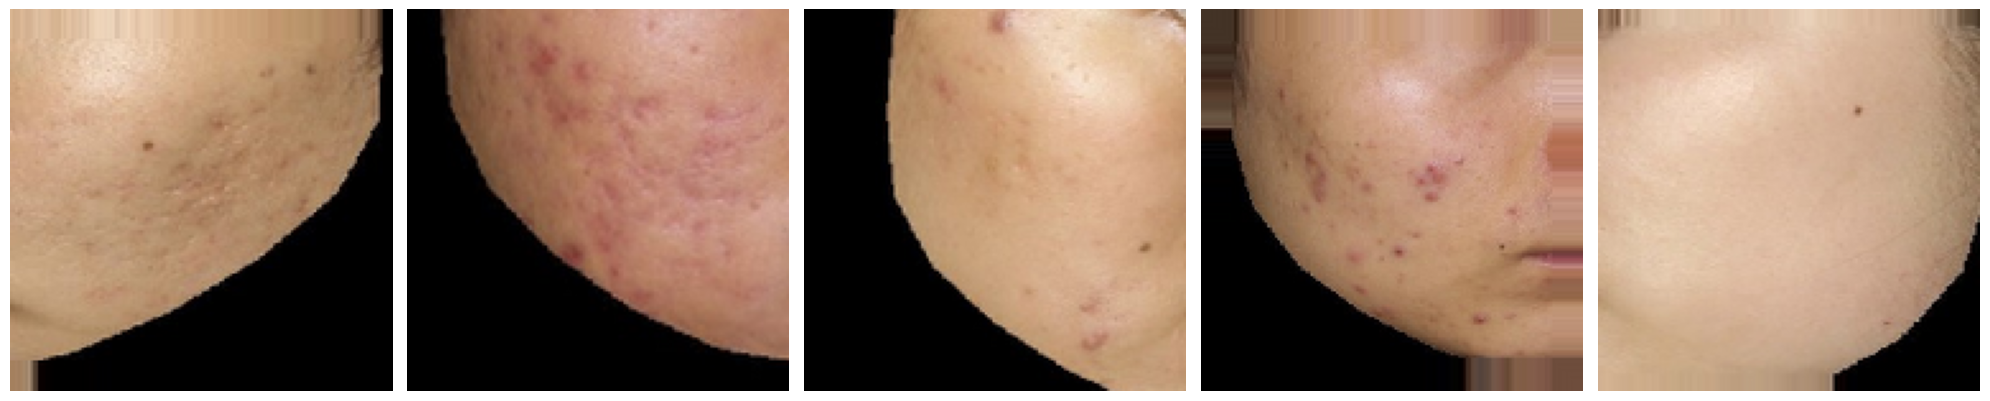

In [18]:
def plot_images(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20, 20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

sample_training_images, _ = next(train_gen)

plot_images(sample_training_images[:5])

In [22]:
# import efficientnet
from tensorflow.keras.applications import EfficientNetB0

# Create an instance of the model
model = EfficientNetB0( weights='imagenet',include_top=False, input_shape=(150, 150, 3))

# Freeze the pre-trained weights
model.trainable = False

# Add a global average pooling layer
x = model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(512, activation='relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.Dense(256, activation='relu')(x)
x = tf.keras.layers.Dense(3, activation='softmax')(x)

model = tf.keras.Model(model.input, x)



In [25]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])   
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 150, 150, 3)]        0         []                            
                                                                                                  
 rescaling_2 (Rescaling)     (None, 150, 150, 3)          0         ['input_2[0][0]']             
                                                                                                  
 normalization_1 (Normaliza  (None, 150, 150, 3)          7         ['rescaling_2[0][0]']         
 tion)                                                                                            
                                                                                                  
 rescaling_3 (Rescaling)     (None, 150, 150, 3)          0         ['normalization_1[0][0]'

In [26]:
history = model.fit(train_gen, validation_data=val_gen, epochs=10, verbose=1)

Epoch 1/10
27/27 [==============================] - 8s 230ms/step - loss: 1.0025 - accuracy: 0.4766 - val_loss: 1.0003 - val_accuracy: 0.4798
Epoch 2/10
27/27 [==============================] - 6s 219ms/step - loss: 0.9949 - accuracy: 0.4715 - val_loss: 0.9909 - val_accuracy: 0.4798
Epoch 3/10
25/27 [==========================>...] - ETA: 0s - loss: 0.9914 - accuracy: 0.4719

KeyboardInterrupt: 

In [ ]:
#image, labels = next(train_gen)
#image.shape

In [33]:
def create_model():
  model = tf.keras.models.Sequential([
      tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),

      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(128, activation='relu'),
      tf.keras.layers.Dropout(0.25),
      tf.keras.layers.Dense(256, activation='relu'),
      tf.keras.layers.Dense(3, activation='softmax')
  ])


  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])


  return model

In [34]:
model = create_model()
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 74, 74, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_11 (Conv2D)          (None, 72, 72, 128)       73856     
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 36, 36, 128)       0         
 ng2D)                                                           
                                                                 
 conv2d_12 (Conv2D)          (None, 34, 34, 256)       295168    
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 17, 17, 256)      

In [35]:
history = model.fit(train_gen,
                    epochs=15,
                    verbose=1,
                    validation_data=val_gen)

Epoch 1/15
27/27 [==============================] - 12s 430ms/step - loss: 0.9537 - accuracy: 0.5070 - val_loss: 0.8310 - val_accuracy: 0.6768
Epoch 2/15
27/27 [==============================] - 11s 415ms/step - loss: 0.8997 - accuracy: 0.6895 - val_loss: 0.7784 - val_accuracy: 0.7424
Epoch 3/15
27/27 [==============================] - 11s 414ms/step - loss: 0.7486 - accuracy: 0.7098 - val_loss: 0.6970 - val_accuracy: 0.7323
Epoch 4/15
27/27 [==============================] - 12s 424ms/step - loss: 0.7385 - accuracy: 0.6984 - val_loss: 0.6615 - val_accuracy: 0.7525
Epoch 5/15
27/27 [==============================] - 11s 415ms/step - loss: 0.7371 - accuracy: 0.7123 - val_loss: 0.6980 - val_accuracy: 0.7222
Epoch 6/15
27/27 [==============================] - 11s 416ms/step - loss: 0.6905 - accuracy: 0.7212 - val_loss: 0.6846 - val_accuracy: 0.7475
Epoch 7/15
27/27 [==============================] - 12s 421ms/step - loss: 0.6858 - accuracy: 0.7224 - val_loss: 0.6612 - val_accuracy: 0.7374